# Load and clean Australia data related job dataset

In [377]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import itertools
from matplotlib import pyplot as plt

In [412]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
#from nltk.corpus import stopwords
import numpy as np
import spacy
nlp = spacy.load('en_core_web_lg')
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/nanxu/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /Users/nanxu/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


ModuleNotFoundError: No module named 'spacy'

In [624]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [582]:
data_jobs_AU  = pd.read_csv('job_ad_unique_au_14122021.csv')

In [583]:
data_jobs_AU.head()

,Unnamed: 0,job_title,job_link,company_name,salary,job_location,job_requirements,job_classifiation,short_description,salary_ind,date_posted,work_type,long_description
0,0,Order Processing & Customer Service,/job/55244809?type=promoted#searchRequestToken...,KG Foods,NaN,Sydney,"['Attractive Remuneration Package', 'Based on ...",Administration & Office Support,"Do you have an analytical mind, good attention...",0-60000,NaN,Full time,Order Processing/Customer Service Kids Gourm...
1,1,Technical Business Analyst - Graduate,/job/55325517?type=promoted#searchRequestToken...,DGIT Systems,NaN,Melbourne,"['Technical Analyst role with exciting work', ...",Information & Communication Technology,We’re looking for someone with practical devel...,0-60000,NaN,Full time,About DGITDGIT is a specialist telecommunicati...
2,2,Data Analyst / Consultant,/job/55305680?type=standard#searchRequestToken...,Cowra High School,NaN,Blue Mountains & Central West,NaN,Education & Training,Data Analyst / Consultant for High Schools,0-60000,NaN,Part time,EOI Expressions of Interest School Data Analys...
3,3,Data Entry Administrator,/job/55321894?type=standout#searchRequestToken...,Link Resources Pty Ltd,NaN,Sunshine Coast,['Dynamic growing business providing opportuni...,Administration & Office Support,Data Entry Administrator Based on the Sunshine...,0-60000,NaN,Full time,Link Resources Training is a Registered Traini...
4,4,"Data Entry, Casual",/job/55320305?type=standard#searchRequestToken...,Insane Technologies,$27 - $30 per hour,Gold Coast,NaN,Administration & Office Support,"Flexible work 20-40 hours per week, $27-$30 pe...",0-60000,NaN,$27 - $30 per hourCasual/Vacation,We are based on the Gold Coast and protect sma...


Remove 2 columns 'Unnamed: 0' and 'date_posted'

In [584]:
AU_jobs = data_jobs_AU.drop(['Unnamed: 0','job_link','date_posted'], axis=1)

In [585]:
AU_jobs.columns.values

array(['job_title', 'company_name', 'salary', 'job_location',
       'job_requirements', 'job_classifiation', 'short_description',
       'salary_ind', 'work_type', 'long_description'], dtype=object)

In [586]:
AU_jobs.isnull().sum()

job_title               0
company_name           33
salary               1346
job_location            0
job_requirements      959
job_classifiation       0
short_description       0
salary_ind              0
work_type               1
long_description        1
dtype: int64

In [587]:
job_title = AU_jobs['job_title'].value_counts()
job_title

Business Analyst                                       104
Data Analyst                                            72
Data Engineer                                           45
Senior Data Engineer                                    25
Technical Business Analyst                              25
                                                      ... 
Demand Planning Data Analyst                             1
Research Administrator                                   1
Customer Experience & Business Intelligence Analyst      1
Asset Maintenance Data Engineer                          1
Safety Reporting Analyst                                 1
Name: job_title, Length: 1410, dtype: int64

In [588]:
AU_jobs['salary_ind'].value_counts()

0-60000          514
60000-80000      364
200000-999999    311
150000-200000    275
120000-150000    210
80000-100000     207
100000-120000    177
Name: salary_ind, dtype: int64

In [589]:
AU_jobs['work_type'].value_counts()

Full time                                                     890
Contract/Temp                                                 388
Casual/Vacation                                                37
Part time                                                      30
Base + Super + Profit ShareFull time                            9
                                                             ... 
$149,643 pa (plus 17% employer superannuation)Full time         1
$30 - $40 per hourCasual/Vacation                               1
Fantastic culture and career growth opportunitiesFull time      1
Base + Super + Performance Bonus + Share Options!Full time      1
$70 per hourContract/Temp                                       1
Name: work_type, Length: 610, dtype: int64

In [590]:
df = pd.DataFrame((AU_jobs['salary_ind']).str.replace('-',' ').str.split())
AU_jobs['Min_income'] = df.salary_ind.apply(lambda x: int(x[0]))
AU_jobs['Max_income'] = df.salary_ind.apply(lambda x: int(x[1]))
AU_jobs['avg_income'] = df.salary_ind.apply(lambda x: int(x[0]) if int(x[1])==999999 else int(x[1]) \
                                                      if int(x[0])==0 else (int(x[0])+int(x[1]))/2)

In [591]:
AU_jobs['avg_income'].value_counts()

60000.0     514
70000.0     364
200000.0    311
175000.0    275
135000.0    210
90000.0     207
110000.0    177
Name: avg_income, dtype: int64

In [592]:
AU_jobs.head()

,job_title,company_name,salary,job_location,job_requirements,job_classifiation,short_description,salary_ind,work_type,long_description,Min_income,Max_income,avg_income
0,Order Processing & Customer Service,KG Foods,NaN,Sydney,"['Attractive Remuneration Package', 'Based on ...",Administration & Office Support,"Do you have an analytical mind, good attention...",0-60000,Full time,Order Processing/Customer Service Kids Gourm...,0,60000,60000.0
1,Technical Business Analyst - Graduate,DGIT Systems,NaN,Melbourne,"['Technical Analyst role with exciting work', ...",Information & Communication Technology,We’re looking for someone with practical devel...,0-60000,Full time,About DGITDGIT is a specialist telecommunicati...,0,60000,60000.0
2,Data Analyst / Consultant,Cowra High School,NaN,Blue Mountains & Central West,NaN,Education & Training,Data Analyst / Consultant for High Schools,0-60000,Part time,EOI Expressions of Interest School Data Analys...,0,60000,60000.0
3,Data Entry Administrator,Link Resources Pty Ltd,NaN,Sunshine Coast,['Dynamic growing business providing opportuni...,Administration & Office Support,Data Entry Administrator Based on the Sunshine...,0-60000,Full time,Link Resources Training is a Registered Traini...,0,60000,60000.0
4,"Data Entry, Casual",Insane Technologies,$27 - $30 per hour,Gold Coast,NaN,Administration & Office Support,"Flexible work 20-40 hours per week, $27-$30 pe...",0-60000,$27 - $30 per hourCasual/Vacation,We are based on the Gold Coast and protect sma...,0,60000,60000.0


In [593]:
group_location = pd.DataFrame((AU_jobs.groupby(['job_location']))['avg_income'].mean())
group_location.sort_values(by =['avg_income'], ascending =False)

,avg_income
job_location,
"Kalgoorlie, Goldfields & Esperance",200000.000000
ACT,137038.216561
Sydney,119832.439678
Toowoomba & Darling Downs,117500.000000
Brisbane,116265.306122
Melbourne,109956.521739
Darwin,100454.545455
Perth,98149.606299
Northern QLD,95000.000000


In [560]:
states = {'NSW':'New South Wales','QLD':'Queensland','SA':'South Australia','TAS':'Tasmania',\
          'AU_VIC':'Victoria','AU_WA':'Western Australia'}


In [594]:
AU_jobs['state'] = AU_jobs.job_location.apply(lambda x: 'Western Australia' if x == 'Kalgoorlie, Goldfields & Esperance' or x == 'Geraldton, Gascoyne & Midwest'\
                                                        else 'New South Wales' if ('NSW') in x or x =='ACT' or x =='Sydney' or x == 'Newcastle, Maitland & Hunter'\
                                                              or x == 'Port Macquarie & Mid North Coast' or x == 'Blue Mountains & Central West'\
                                                              or x == 'Coffs Harbour & North Coast' or x == 'Wollongong, Illawarra & South Coast' \
                                                              or x == 'Gosford & Central Coast' or x == 'Hobart' or x =='Lismore & Far North Coast'\
                                                              or x == 'Southern Highlands & Tablelands' or x == 'Wagga Wagga & Riverina' \
                                                              or x == 'Albury Area'   \
                                                        else 'Queensland' if x == 'Toowoomba & Darling Downs' or x =='Brisbane'\
                                                              or x == 'Hervey Bay & Fraser Coast'\
                                                        else 'Victoria' if ('VIC') in x or x == 'Melbourne' or x =='Ballarat & Central Highlands'\
                                                              or x =='Shepparton & Goulburn Valley' or x == 'Mornington Peninsula & Bass Coast' \
                                                              or x =='Bairnsdale & Gippsland' or x == 'Bendigo, Goldfields & Macedon Ranges'\
                                                        else 'Western Australia' if x == 'Perth' or x =='Port Hedland, Karratha & Pilbara'\
                                                              or x == 'Northam & Wheatbelt' or x == 'Bunbury & South West'\
                                                        else 'Queensland' if ('QLD') in x or x == 'Sunshine Coast' or x =='Mackay & Coalfields'\
                                                              or x =='Cairns & Far North' or x == 'Bundaberg & Wide Bay Burnett' or x == 'Gold Coast'\
                                                        else 'South Australia' if x == 'Adelaide'
                                                        else x)

In [595]:
avg_income_by_state = AU_jobs.groupby(['state'])['avg_income'].describe()[['count', 'mean']].sort_values(by='mean',ascending = False)
avg_income_by_state.reset_index(inplace = True)


<BarContainer object of 7 artists>

Text(0.5, 1.0, 'Average income by state')

Text(0.5, 0, 'State of Australia')

Text(0, 0.5, 'Average income $')

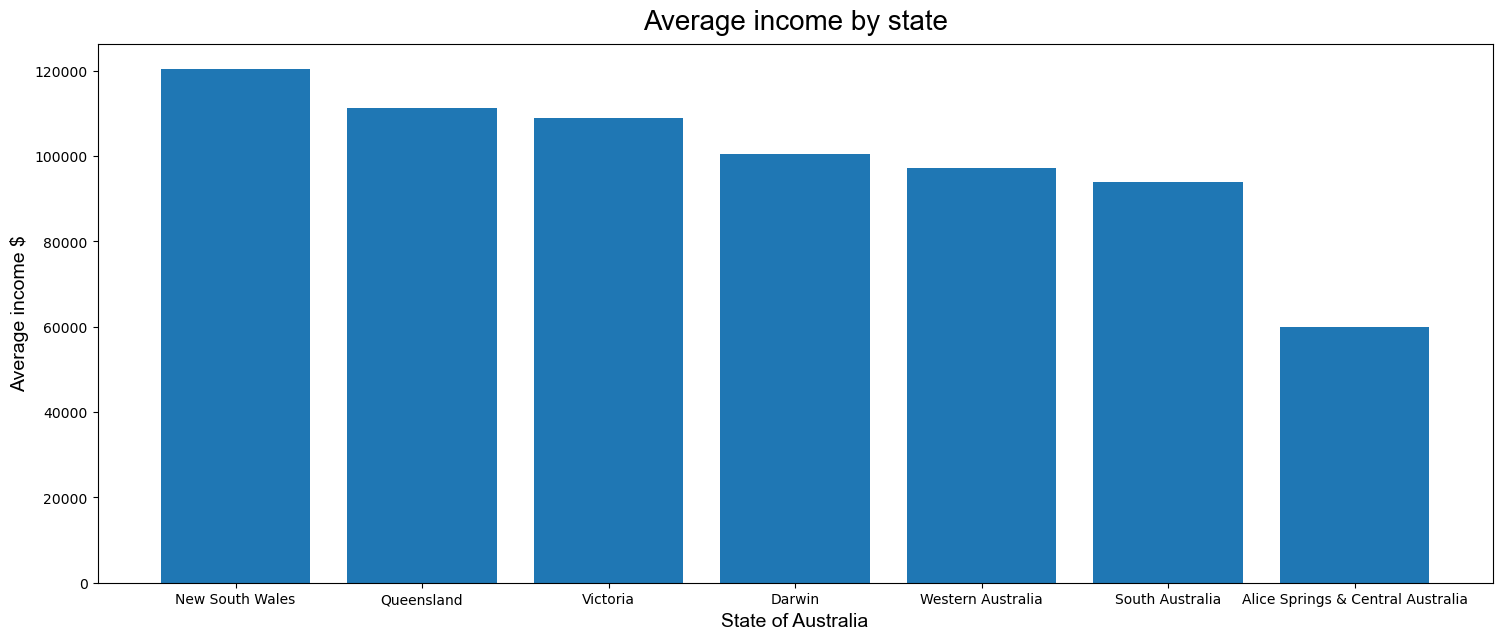

In [596]:
# Figure Size
fig = plt.figure(figsize =(18, 7))
 
# Horizontal Bar Plot
plt.bar(avg_income_by_state['state'],avg_income_by_state['mean'])

# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'20', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} 
axis_font = {'fontname':'Arial', 'size':'14'}

plt.title('Average income by state', **title_font)
plt.xlabel('State of Australia', **axis_font)
plt.ylabel('Average income $', **axis_font)

# Show Plot
plt.show()

<BarContainer object of 7 artists>

Text(0.5, 1.0, 'Number of job advertisements by state')

Text(0.5, 0, 'State of Australia')

Text(0, 0.5, 'Average income $')

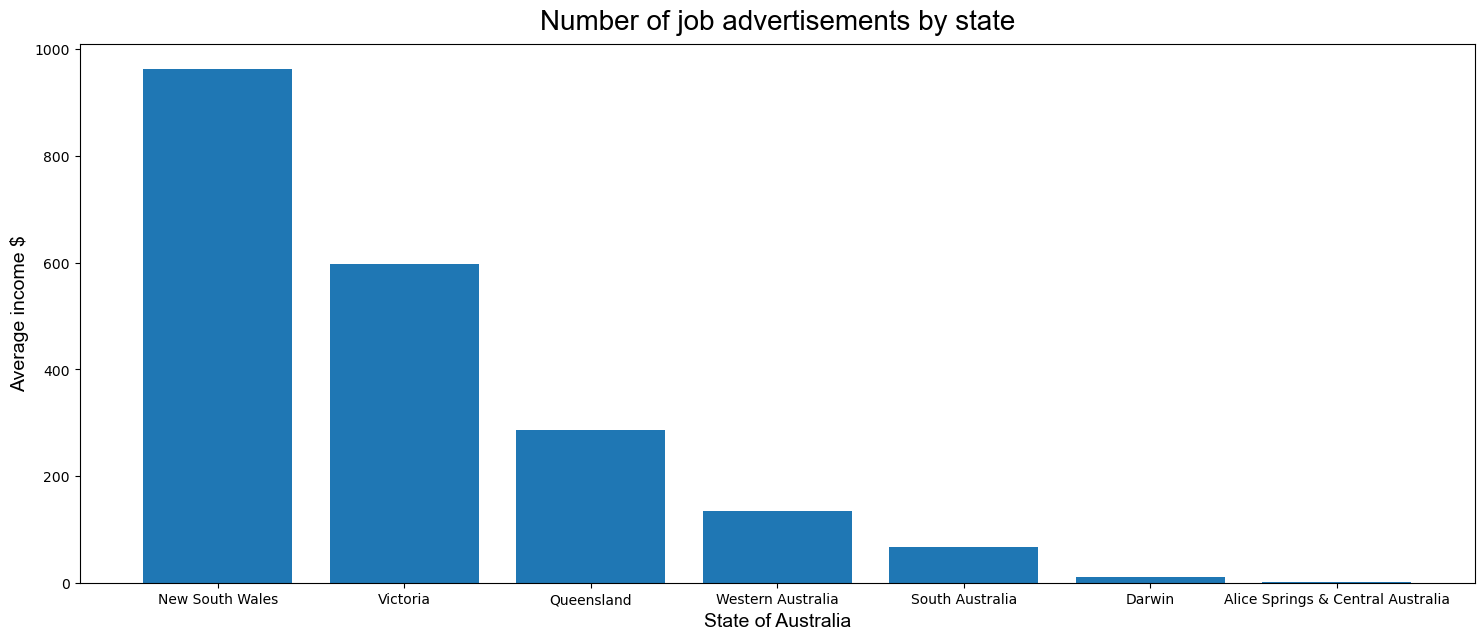

In [597]:
nu_jobs_by_state = avg_income_by_state.sort_values(by='count',ascending = False)
# Figure Size
fig = plt.figure(figsize =(18, 7))
 
# Horizontal Bar Plot
plt.bar(nu_jobs_by_state['state'],nu_jobs_by_state['count'])

# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'20', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} 
axis_font = {'fontname':'Arial', 'size':'14'}

plt.title('Number of job advertisements by state', **title_font)
plt.xlabel('State of Australia', **axis_font)
plt.ylabel('Average income $', **axis_font)

# Show Plot
plt.show()

Analyse job descriptions

Remove NaN in long_description column; One row with NaN long_description.

In [598]:
long_description = pd.DataFrame(AU_jobs['long_description'])
df = long_description[long_description['long_description'].notnull()]
df = df['long_description']

In [599]:
#This splits all the sentences up which makes it easier for us to work with

all_sentences = []

for word in df:
    all_sentences.append(word)

all_sentences
#df1 = df.to_string()

#df_split = df1.split()

#df_split

lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)
lines[0:100]

['Order Processing/Customer Service \xa0 Kids Gourmet Food is a volume catering business and the\xa0National leading provider of\xa0prepared meals to the childcare industry in Sydney, Brisbane & Melbourne. Our growing business is based on Sydney’s Northern Beaches, and we are looking for an Order Processing/Customer Service person. \xa0 Working in our Business Development Team, you will take care of processing orders and customer service related activities. We are looking for a positive and energetic team member with database experience and excellent attention to detail. This is a full-time position with office hours 8am – 4pm. \xa0 Key Responsibilities include:  Order processing and printing on internal website Maintain and update customer database Customer service and support Oversee and monitor daily transport and logistics Developing and maintaining effective procedures and/or processes to achieve work outputs. General office administration (typing, filing and data entry) \xa0 You 

['Order',
 'Processing/Customer',
 'Service',
 'Kids',
 'Gourmet',
 'Food',
 'is',
 'a',
 'volume',
 'catering',
 'business',
 'and',
 'the',
 'National',
 'leading',
 'provider',
 'of',
 'prepared',
 'meals',
 'to',
 'the',
 'childcare',
 'industry',
 'in',
 'Sydney,',
 'Brisbane',
 '&',
 'Melbourne.',
 'Our',
 'growing',
 'business',
 'is',
 'based',
 'on',
 'Sydney’s',
 'Northern',
 'Beaches,',
 'and',
 'we',
 'are',
 'looking',
 'for',
 'an',
 'Order',
 'Processing/Customer',
 'Service',
 'person.',
 'Working',
 'in',
 'our',
 'Business',
 'Development',
 'Team,',
 'you',
 'will',
 'take',
 'care',
 'of',
 'processing',
 'orders',
 'and',
 'customer',
 'service',
 'related',
 'activities.',
 'We',
 'are',
 'looking',
 'for',
 'a',
 'positive',
 'and',
 'energetic',
 'team',
 'member',
 'with',
 'database',
 'experience',
 'and',
 'excellent',
 'attention',
 'to',
 'detail.',
 'This',
 'is',
 'a',
 'full-time',
 'position',
 'with',
 'office',
 'hours',
 '8am',
 '–',
 '4pm.',
 'Key'

In [600]:
#Removing Punctuation

lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)
        
lines2[0:10]

['Order',
 'ProcessingCustomer',
 'Service',
 'Kids',
 'Gourmet',
 'Food',
 'is',
 'a',
 'volume',
 'catering']

Check what technical tool is mentioned in the long description

In [437]:
#This is stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))
    
stem[0:10]

['order',
 'processingcustom',
 'servic',
 'kid',
 'gourmet',
 'food',
 'is',
 'a',
 'volum',
 'cater']

In [637]:
#Removing all Stop Words

stem2 = []
stopWords = set(stopwords.words('english'))
stopWords.update(['data','business','experience','work','team','role','Data','skills',
                  'working','We','The','including','across','You','within', 'ability',
                  'new','Business','Experience','please','This','apply','Australia','provide','services'])
for word in lines2:
    if word not in stopWords:
        stem2.append(word)

stem2[0:100]

['Order',
 'ProcessingCustomer',
 'Service',
 'Kids',
 'Gourmet',
 'Food',
 'volume',
 'catering',
 'National',
 'leading',
 'provider',
 'prepared',
 'meals',
 'childcare',
 'industry',
 'Sydney',
 'Brisbane',
 'Melbourne',
 'Our',
 'growing',
 'based',
 'Sydneys',
 'Northern',
 'Beaches',
 'looking',
 'Order',
 'ProcessingCustomer',
 'Service',
 'person',
 'Working',
 'Development',
 'Team',
 'take',
 'care',
 'processing',
 'orders',
 'customer',
 'service',
 'related',
 'activities',
 'looking',
 'positive',
 'energetic',
 'member',
 'database',
 'excellent',
 'attention',
 'detail',
 'fulltime',
 'position',
 'office',
 'hours',
 '8am',
 '4pm',
 'Key',
 'Responsibilities',
 'include',
 'Order',
 'processing',
 'printing',
 'internal',
 'website',
 'Maintain',
 'update',
 'customer',
 'database',
 'Customer',
 'service',
 'support',
 'Oversee',
 'monitor',
 'daily',
 'transport',
 'logistics',
 'Developing',
 'maintaining',
 'effective',
 'procedures',
 'andor',
 'processes',
 'ach

In [638]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
df = pd.DataFrame(stem2)
df = df[0].value_counts()
df.to_csv('wordcount.csv')

In [639]:
#This will give frequencies of our words

from nltk.probability import FreqDist

freqdoctor = FreqDist()

for words in df:
    freqdoctor[words] += 1

freqdoctor

FreqDist({1: 22803, 2: 5003, 3: 2216, 4: 1390, 5: 998, 6: 698, 7: 552, 8: 437, 9: 367, 10: 345, ...})

In [640]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1000x500 with 0 Axes>

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

Text(0.5, 1.0, 'Top Words Overall')

Text(0, 0.5, 'Word from Tweet')

Text(0.5, 0, 'Count of Words')

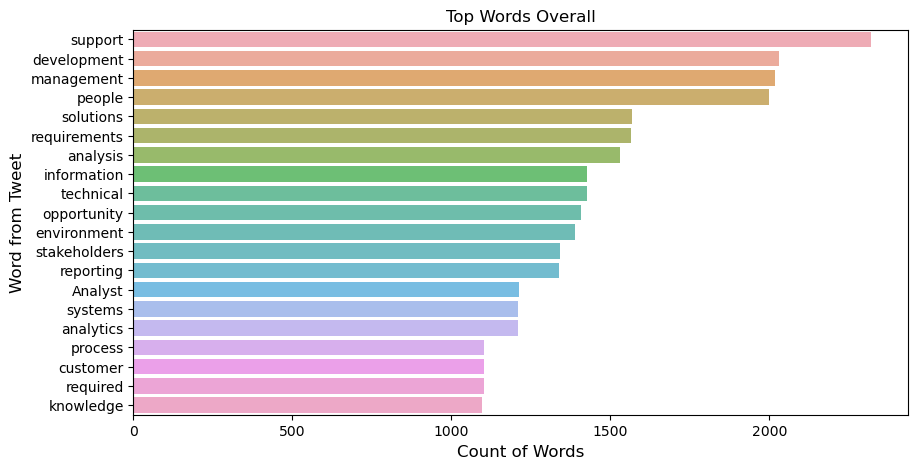

In [641]:
#This is a simple plot that shows the top 20 words being used
#df.plot(20)

df = df[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [ ]:
['data','business','experience','work','team','role','Data','skills','working','We','The','including','across','You','within',\
 'ability','new','Business','Experience','please','This','apply','Australia','provide','services']

In [606]:
AU_jobs['company_name'].value_counts()

Talent – SEEK Recruitment Agency of the Year | 7 Time Winner    30
SEEK Limited                                                    26
Bluefin Resources Pty Limited                                   25
Recruitment Hive                                                19
Paxus                                                           19
                                                                ..
Huhtamaki TP (WA)                                                1
Monash University                                                1
The Digital Project                                              1
CloudStreet Consulting                                           1
Boehunter Healthcare & Life Sciences                             1
Name: company_name, Length: 1040, dtype: int64

In [622]:
skills = ['python','r','django',"c++",'database','sql', 'sas','development','cloud','visualisation','api']
AU_jobs = AU_jobs[AU_jobs['long_description'].notnull()]
for skill in skills:
    AU_jobs[skill+'_tag'] = 0
AU_jobs['long_description_split']  = AU_jobs.apply(lambda x: x['long_description'].split(), axis=1)  
#AU_jobs['skills'] = AU_jobs.apply(lambda x: i for i in skills if i in x['long_description'].split()], axis=1)
AU_jobs['lower'] = AU_jobs.apply(map(lambda x: x.lower(), x['long_description_split']), axis=1)

NameError: name 'x' is not defined

In [607]:
skills = ['python','r','django',"c++",'database','sql', 'sas','development','cloud','visualisation','api']
for skill in skills:
    AU_jobs[skill+'_tag'] = 0
AU_jobs.head()

,job_title,company_name,salary,job_location,job_requirements,job_classifiation,short_description,salary_ind,work_type,long_description,...,r_tag,django_tag,c++_tag,database_tag,sql_tag,sas_tag,development_tag,cloud_tag,visualisation_tag,api_tag
0,Order Processing & Customer Service,KG Foods,NaN,Sydney,"['Attractive Remuneration Package', 'Based on ...",Administration & Office Support,"Do you have an analytical mind, good attention...",0-60000,Full time,Order Processing/Customer Service Kids Gourm...,...,0,0,0,0,0,0,0,0,0,0
1,Technical Business Analyst - Graduate,DGIT Systems,NaN,Melbourne,"['Technical Analyst role with exciting work', ...",Information & Communication Technology,We’re looking for someone with practical devel...,0-60000,Full time,About DGITDGIT is a specialist telecommunicati...,...,0,0,0,0,0,0,0,0,0,0
2,Data Analyst / Consultant,Cowra High School,NaN,Blue Mountains & Central West,NaN,Education & Training,Data Analyst / Consultant for High Schools,0-60000,Part time,EOI Expressions of Interest School Data Analys...,...,0,0,0,0,0,0,0,0,0,0
3,Data Entry Administrator,Link Resources Pty Ltd,NaN,Sunshine Coast,['Dynamic growing business providing opportuni...,Administration & Office Support,Data Entry Administrator Based on the Sunshine...,0-60000,Full time,Link Resources Training is a Registered Traini...,...,0,0,0,0,0,0,0,0,0,0
4,"Data Entry, Casual",Insane Technologies,$27 - $30 per hour,Gold Coast,NaN,Administration & Office Support,"Flexible work 20-40 hours per week, $27-$30 pe...",0-60000,$27 - $30 per hourCasual/Vacation,We are based on the Gold Coast and protect sma...,...,0,0,0,0,0,0,0,0,0,0


In [1]:
def func(x):
    skills = ['python','r','django',"c++",'database','sql','sas','development','cloud','visualisation','api']
    text = list(map(lambda y: y.lower(), x['long_description'].split()))
    for skill in skills:        
        if skill in text:
            x[skill+'_tag'] = 1
    return x

In [2]:
AU_jobs.head()

NameError: name 'AU_jobs' is not defined

In [3]:
#AU_jobs[skill+'_tag'] = False
AU_jobs = AU_jobs[AU_jobs['long_description'].notnull()]
test = AU_jobs.apply(func1,axis=1)
test.sample(10)

NameError: name 'AU_jobs' is not defined

In [531]:
AU_jobs['Python'] = AU_jobs.skills.apply(lambda x: 1 if 'python' in x else 0)
AU_jobs['R'] = AU_jobs.skills.apply(lambda x: 1 if 'R' in x else 0)
AU_jobs['Django'] = AU_jobs.skills.apply(lambda x: 1 if 'Django' in x else 0)
AU_jobs['C++'] = AU_jobs.skills.apply(lambda x: 1 if 'C++' in x else 0)
AU_jobs['Database'] = AU_jobs.skills.apply(lambda x: 1 if 'database' in x else 0)
AU_jobs['SQL'] = AU_jobs.skills.apply(lambda x: 1 if 'SQL' in x else 0)
AU_jobs['SAS'] = AU_jobs.skills.apply(lambda x: 1 if 'SAS' in x else 0)
AU_jobs['Development'] = AU_jobs.skills.apply(lambda x: 1 if 'development' in x else 0)
AU_jobs['Cloud'] = AU_jobs.skills.apply(lambda x: 1 if 'cloud' in x else 0)
AU_jobs['Visualisation'] = AU_jobs.skills.apply(lambda x: 1 if 'visualisation' in x else 0)
AU_jobs['API'] = AU_jobs.skills.apply(lambda x: 1 if 'API' in x else 0)
AU_jobs['Python']

0       0
1       0
2       0
3       0
4       0
       ..
2053    0
2054    0
2055    0
2056    0
2057    0
Name: Python, Length: 2057, dtype: int64

In [533]:
Total = {
        'R': AU_jobs['R'].sum(), 
        'Django': AU_jobs['Django'].sum(), 
        'C++': AU_jobs['C++'].sum(), 
        'Database': AU_jobs['Database'].sum(), 
        'SQL': AU_jobs['SQL'].sum(), 
        'SAS': AU_jobs['SAS'].sum(), 
        'Development': AU_jobs['Development'].sum(), 
        'Cloud': AU_jobs['Cloud'].sum(), 
        'Visualisation': AU_jobs['Visualisation'].sum(), 
        'API': AU_jobs['API'].sum(),
        'Python': AU_jobs['Python'].sum()
        }
Total

{'R': 74,
 'Django': 0,
 'C++': 7,
 'Database': 234,
 'SQL': 498,
 'SAS': 50,
 'Development': 975,
 'Cloud': 180,
 'Visualisation': 165,
 'API': 35,
 'Python': 11}

In [58]:
AU_jobs['SQL_flag'] = AU_jobs['long_description'].str.lower().str.contains('sql')
AU_jobs['SAS_flag'] = AU_jobs['long_description'].str.lower().str.contains('sas')
AU_jobs['Python_flag'] = AU_jobs['long_description'].str.lower().str.contains('python')
AU_jobs['PowerBI_flag'] = AU_jobs['long_description'].str.lower().str.contains('power BI')

In [50]:
AU_jobs.head(50)

,job_title,job_link,company_name,salary,job_location,job_requirements,job_classifiation,short_description,salary_ind,work_type,long_description,SQL_flag,SAS_flag,Python_flag,WFH_flag,PowerBI_flag,R_flag
0,Order Processing & Customer Service,/job/55244809?type=promoted#searchRequestToken...,KG Foods,NaN,Sydney,"['Attractive Remuneration Package', 'Based on ...",Administration & Office Support,"Do you have an analytical mind, good attention...",0-60000,Full time,Order Processing/Customer Service Kids Gourm...,False,False,False,True,False,False
1,Technical Business Analyst - Graduate,/job/55325517?type=promoted#searchRequestToken...,DGIT Systems,NaN,Melbourne,"['Technical Analyst role with exciting work', ...",Information & Communication Technology,We’re looking for someone with practical devel...,0-60000,Full time,About DGITDGIT is a specialist telecommunicati...,False,False,False,True,False,False
2,Data Analyst / Consultant,/job/55305680?type=standard#searchRequestToken...,Cowra High School,NaN,Blue Mountains & Central West,NaN,Education & Training,Data Analyst / Consultant for High Schools,0-60000,Part time,EOI Expressions of Interest School Data Analys...,False,False,False,False,False,False
3,Data Entry Administrator,/job/55321894?type=standout#searchRequestToken...,Link Resources Pty Ltd,NaN,Sunshine Coast,['Dynamic growing business providing opportuni...,Administration & Office Support,Data Entry Administrator Based on the Sunshine...,0-60000,Full time,Link Resources Training is a Registered Traini...,False,True,False,False,False,False
4,"Data Entry, Casual",/job/55320305?type=standard#searchRequestToken...,Insane Technologies,$27 - $30 per hour,Gold Coast,NaN,Administration & Office Support,"Flexible work 20-40 hours per week, $27-$30 pe...",0-60000,$27 - $30 per hourCasual/Vacation,We are based on the Gold Coast and protect sma...,False,False,False,False,False,False
5,Trainee Data Analyst,/job/55320074?type=standout#searchRequestToken...,Roy Morgan Research,NaN,Melbourne,"[""Join Australia's most trusted Market Researc...",Marketing & Communications,Roy Morgan has an opportunity available for an...,0-60000,Full time,Roy Morgan has an opportunity available for an...,False,False,False,False,False,True
6,Data Officer,/job/55308677?type=standout#searchRequestToken...,Fletcher Building Limited,NaN,Melbourne,"['Take the next steps in career', 'Join in our...",Administration & Office Support,Amazing opportunity to join a Business that le...,0-60000,Full time,Proud to be Australian MadeOur products and pe...,False,False,False,False,False,False
7,Junior Analyst,/job/55280468?type=standard#searchRequestToken...,people2people - Sydney,"$32.50 per hour, Junior Analyst | Multination",Sydney,NaN,Accounting,Junior Analyst | Multinational FMCG | North Sy...,0-60000,"$32.50 per hour, Junior Analyst | MultinationC...",Are you looking to work for a multinational FM...,False,False,False,False,False,False
8,Graduate Data Analyst,/job/55287796?type=standard#searchRequestToken...,CPM Australia,NaN,Melbourne,NaN,Information & Communication Technology,Seeking an enthusiastic and hands on Graduate ...,0-60000,Full time,About the Position:We have a fantastic opportu...,True,False,False,False,False,False
9,"Junior Data Insights Analyst, Kayo Binge & Flash",/job/55287401?type=standout#searchRequestToken...,Foxtel Group,NaN,Sydney,"['Data, Insights & Stakeholder Engagement', 'F...",Consulting & Strategy,Looking to continue your career in Data & Insi...,0-60000,Full time,About Us\nStreamotion is home to Kayo - Austra...,True,False,True,True,False,False


In [ ]:
AU_jobs['R_flag'] = AU_jobs['long_description'].str.count('R')

In [ ]:
AU_jobs['WFH_flag'] = AU_jobs['long_description'].str.lower().str.contains('wfh|working from home|flexibility')